**Importing python packages**

In [1]:
# Importing the required Libraries

import numpy as np                  # numpy
import matplotlib.pyplot as plt     # matplotlib
import pandas as pd                 # pandas
import itertools                    # itertools
import seaborn as sns               # seaborn

**Analysing the Diabetes Dataset**

In [2]:
# Reading dataset from .csv file

dataset = pd.read_csv('sample_data/diabetes.csv') # reading diabetes.csv
dataset.head()                                    # checking the top values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Missing values in the Insulin column")
print("Total : ", dataset[dataset.Insulin == 0].shape[0])
print(dataset[dataset.Insulin == 0].groupby('Outcome')['Age'].count())
print("Missing values in the BMI column")
print("Total : ", dataset[dataset.BMI == 0].shape[0])
print(dataset[dataset.BMI == 0].groupby('Outcome')['Age'].count())
print("Missing values in the SkinThickness column")
print("Total : ", dataset[dataset.SkinThickness == 0].shape[0])
print(dataset[dataset.SkinThickness == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Bloodpressure column")
print("Total : ", dataset[dataset.BloodPressure == 0].shape[0])
print(dataset[dataset.BloodPressure == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Glucose column")
print("Total : ", dataset[dataset.Glucose == 0].shape[0])
print(dataset[dataset.Glucose == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Pregnancies column")
print("Total : ", dataset[dataset.Pregnancies == 0].shape[0])
print(dataset[dataset.Pregnancies == 0].groupby('Outcome')['Age'].count())




Missing values in the Insulin column
Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64
Missing values in the BMI column
Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64
Missing values in the SkinThickness column
Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64
Missing values in the Bloodpressure column
Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64
Missing values in the Glucose column
Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64
Missing values in the Pregnancies column
Total :  111
Outcome
0    73
1    38
Name: Age, dtype: int64


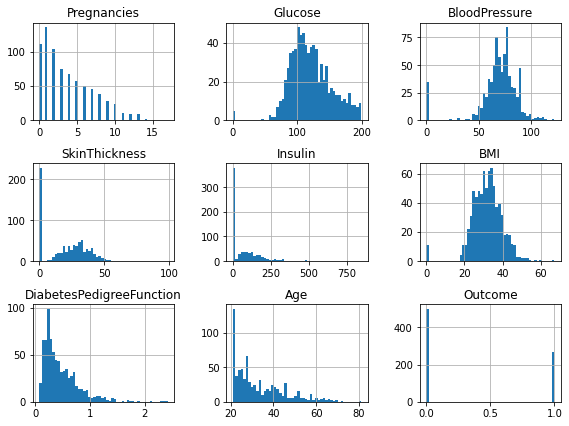

In [4]:
dataset.hist(bins=50, figsize = (8.0, 6.0))           # function used to plot histogram, bins are the size of the BARs in histogram
plt.tight_layout(True)                                # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()                                            # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

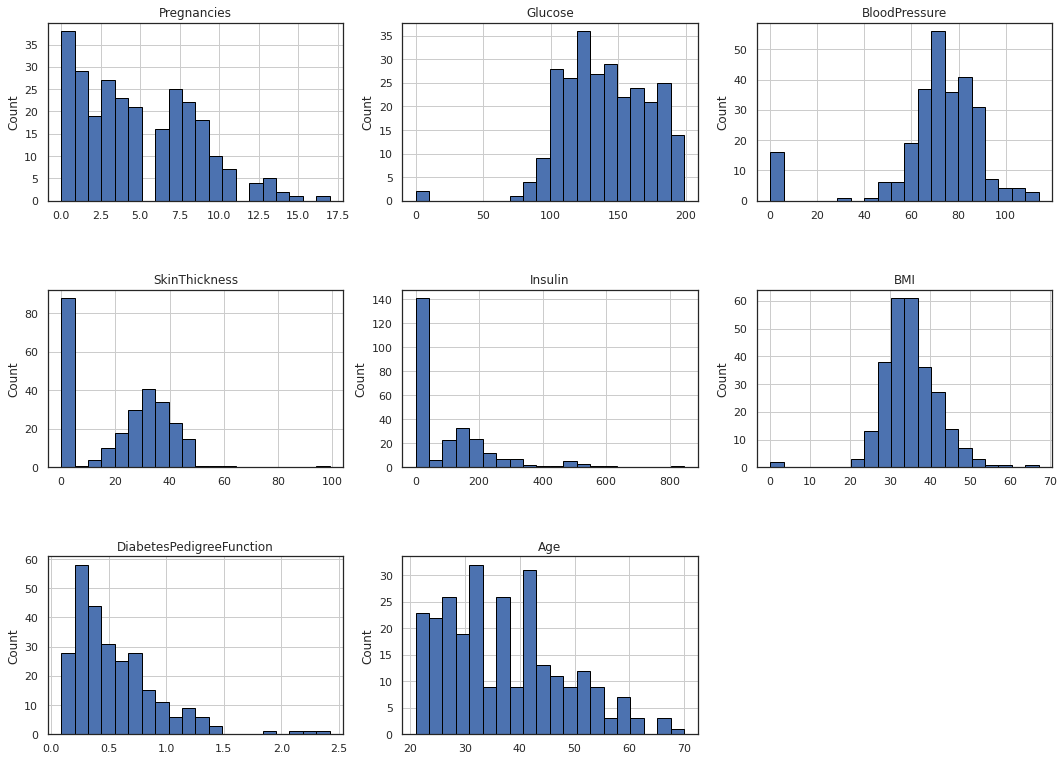

In [ ]:
# Analysis of Diabetic Cases

dataset1 = dataset[dataset["Outcome"]==1]  # all the values in dataset with outcome = 1
columns = dataset.columns[:8]              # consider first 8 columns excluding outcome
plt.subplots(figsize=(18,18))              # figure size
length =len(columns)                       # length of columns = 7
for i,j in itertools.zip_longest(columns,range(length)):  # i and j range in all columns, 0 to 7
    plt.subplot((length/2),3,j+1)                         # 3 rows, 3 columns and j+1 number of plot
    plt.subplots_adjust(wspace=0.2,hspace=0.5)            # wspace and hspace is space reserved between two subplots and hspace is
    plt.ylabel("Count")                                   # y label = count
    dataset1[i].hist(bins=20,edgecolor='black')           # function used to plot histogram, bins are the size of the BARs in histogram
    plt.title(i)                                          # title name is the column name as per every plot 
plt.show()                                                # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

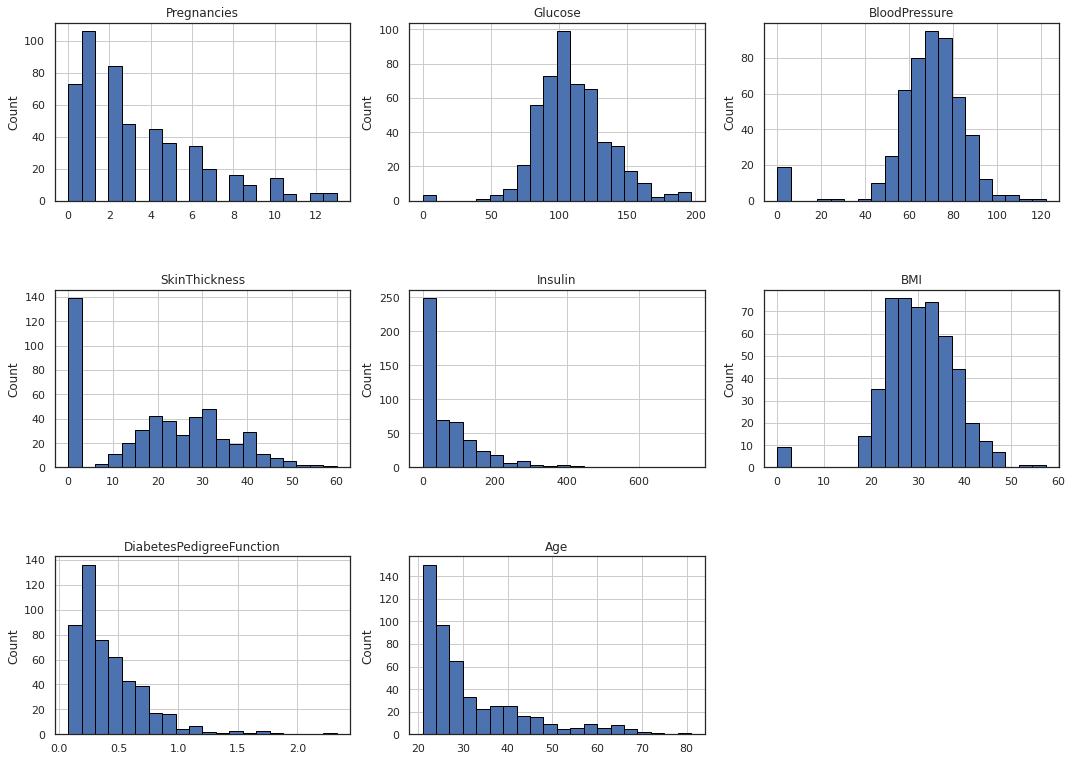

In [ ]:
# General Analysis

dataset2 = dataset[dataset["Outcome"]==0]         # all the values in dataset with outcome = 0
columns = dataset.columns[:8]                     # consider first 8 columns excluding outcome
plt.subplots(figsize=(18,18))                     # figure size
length =len(columns)                              # length of columns = 7
for i,j in itertools.zip_longest(columns,range(length)):    # i and j range in all columns, 0 to 7
    plt.subplot((length/2),3,j+1)                           # 3 rows, 3 columns and j+1 number of plot
    plt.subplots_adjust(wspace=0.2,hspace=0.5)              # wspace and hspace is space reserved between two subplots and hspace is
    plt.ylabel("Count")                                     # y label = count
    dataset2[i].hist(bins=20,edgecolor='black')             # function used to plot histogram, bins are the size of the BARs in histogram
    plt.title(i)                                            # title name is the column name as per every plot 
plt.show()                                                  # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

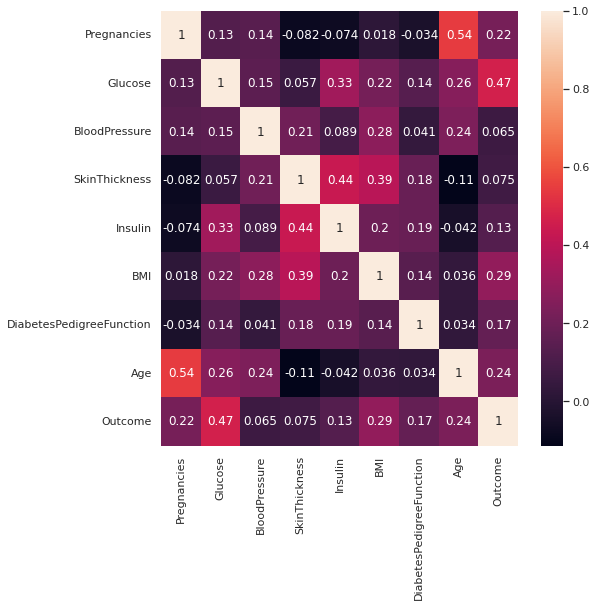

In [ ]:
# plotting correlation heatmap

sns.heatmap(dataset.corr(),annot=True) # plotting the heatmap, corr() is used to find the pairwise correlation of all columns in the dataframe, annot: If True, write the data value in each cell.
fig = plt.gcf()                        # plt. gcf() allows you to get a reference to the current figure when using pyplot.
fig.set_size_inches(8,8)               # define the size of figure in inches

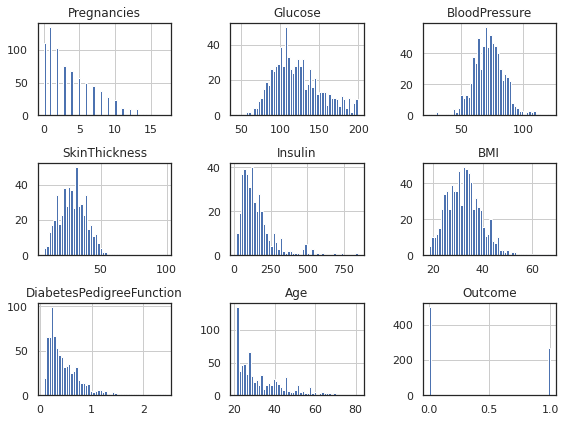

In [ ]:
# Replacing the missing or null entries in dataset by np.Nan

# Plotting the histograms of various parameters (columns) in dataset

col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:
   dataset[c] = dataset[c].replace(0, np.nan)
dataset.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()


In [ ]:
# Checking the summary stastics of the given dataset

dataset.describe().round(2) # rounded to nearest 2 integer values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
# Checking the top values

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0, 0.5, 'Count of Patients')

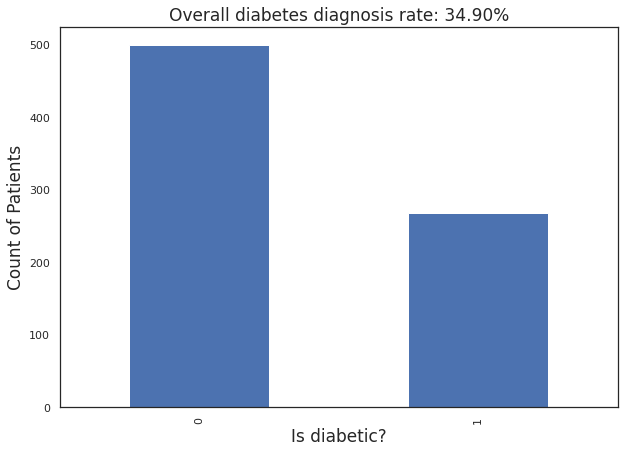

In [ ]:
# Visualizing distribution of Outcome feature

plt.figure(figsize=(10,7))
dataset.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = dataset.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=17)
plt.xlabel('Is diabetic?', size=17)
plt.ylabel('Count of Patients', size=17)

**Checking relation of various features with each other using scatter plot**

Text(0.5, 25.960000000000043, 'Oral Glucose Tolerance Test - Glucose Level')

<Figure size 936x648 with 0 Axes>

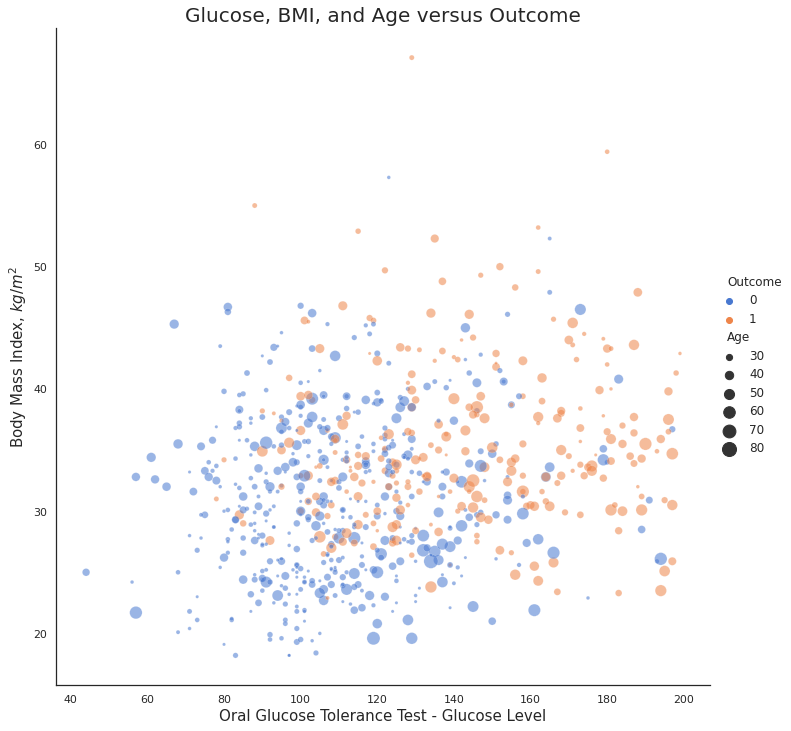

In [ ]:
# Glucose vs BMI vs Age as Size and Outcome as Color

sns.set_theme(style="white")

plt.figure(figsize=(13,9))

sns.relplot(x="Glucose", y="BMI", hue="Outcome", size="Age",
            sizes=(10, 200), alpha=.55, palette="muted",
            height=10, data=dataset)

plt.title("Glucose, BMI, and Age versus Outcome", size=20)
plt.ylabel('Body Mass Index, $kg/m^2$', size=15)
plt.xlabel('Oral Glucose Tolerance Test - Glucose Level', size=15)

Text(0.5, 25.960000000000043, 'Oral Glucose Tolerance Test - Glucose Level')

<Figure size 936x648 with 0 Axes>

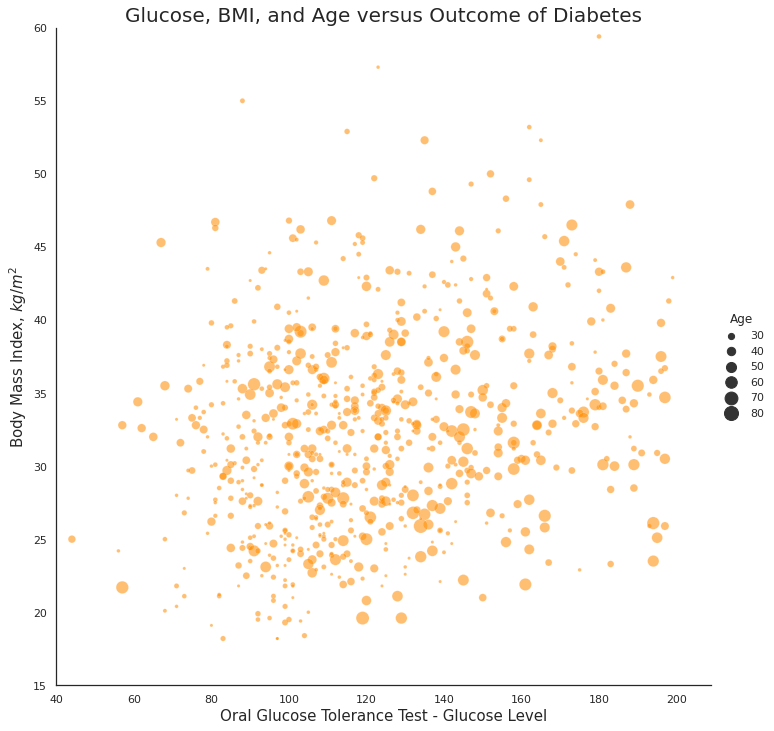

In [ ]:
diabetics = dataset[dataset.Outcome == 1]

# Glucose vs BMI vs Age as Size and Outcome = positive as Color 

sns.set_theme(style="white")

plt.figure(figsize=(13,9))


sns.relplot(x="Glucose", y="BMI",size="Age",
            sizes=(10, 200), color='darkorange',alpha=.55, palette="muted",
            height=10, data=dataset)

plt.xlim(40)
plt.ylim((15,60))

plt.title("Glucose, BMI, and Age versus Outcome of Diabetes", size=20)
plt.ylabel('Body Mass Index, $kg/m^2$', size=15)
plt.xlabel('Oral Glucose Tolerance Test - Glucose Level', size=15)

Text(0.5, 25.960000000000043, 'Oral Glucose Tolerance Test - Glucose Level')

<Figure size 936x648 with 0 Axes>

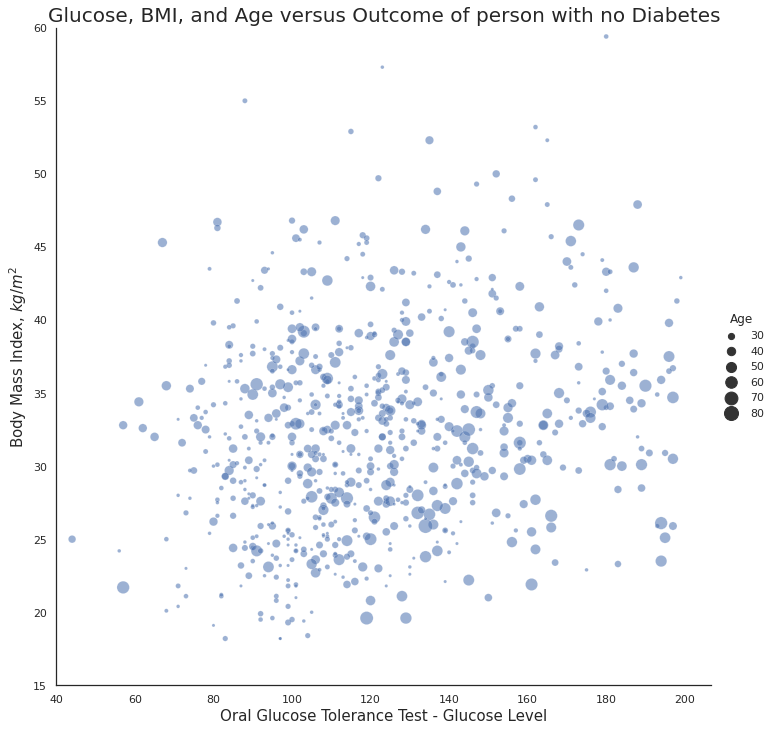

In [ ]:
non_diabetics = dataset[dataset.Outcome == 0]

# Glucose vs BMI vs Age as Size and Outcome = negative as Color

sns.set_theme(style="white")

plt.figure(figsize=(13,9))


sns.relplot(x="Glucose", y="BMI",size="Age",
            sizes=(10, 200),alpha=.55, palette="muted",
            height=10, data=dataset)

plt.xlim(40)
plt.ylim((15,60))

plt.title("Glucose, BMI, and Age versus Outcome of person with no Diabetes", size=20)
plt.ylabel('Body Mass Index, $kg/m^2$', size=15)
plt.xlabel('Oral Glucose Tolerance Test - Glucose Level', size=15)

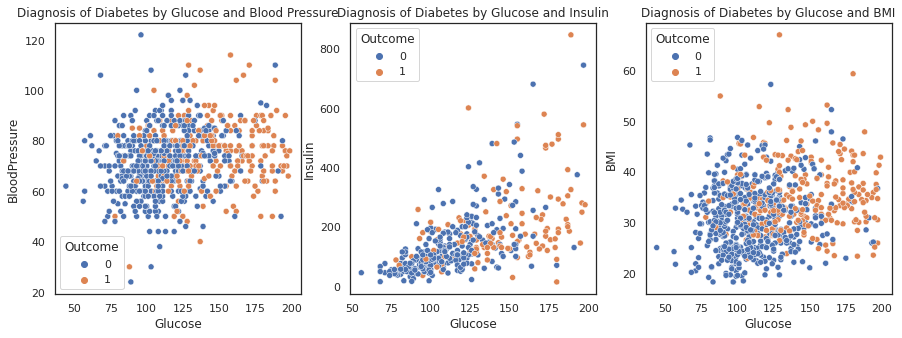

In [ ]:
#Visualisation of Glucose with other features Blood Pressure, Insulin, BMI with the help of subplots

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('Diagnosis of Diabetes by Glucose and Blood Pressure')
sns.scatterplot(x=dataset.Glucose, y=dataset.BloodPressure, hue=dataset.Outcome)

plt.subplot(132)
plt.title('Diagnosis of Diabetes by Glucose and Insulin')
sns.scatterplot(x=dataset.Glucose, y=dataset.Insulin, hue=dataset.Outcome)

plt.subplot(133)
plt.title('Diagnosis of Diabetes by Glucose and BMI')
sns.scatterplot(x=dataset.Glucose, y=dataset.BMI, hue=dataset.Outcome)



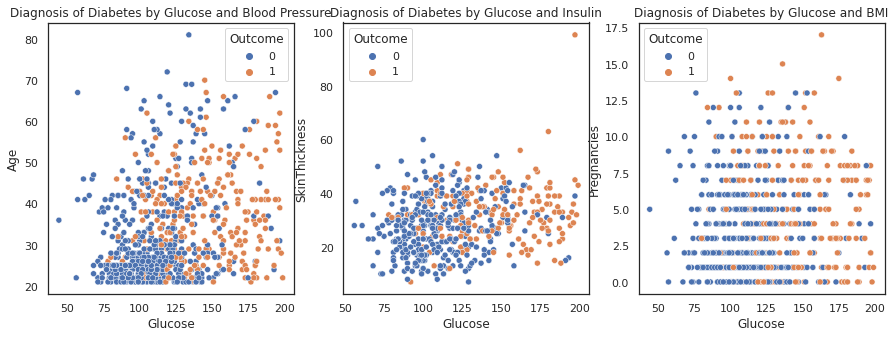

In [ ]:
#Visualisation of Glucose with other features Blood Pressure, Insulin, BMI
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('Diagnosis of Diabetes by Glucose and Blood Pressure')
sns.scatterplot(x=dataset.Glucose, y=dataset.Age, hue=dataset.Outcome)

plt.subplot(132)
plt.title('Diagnosis of Diabetes by Glucose and Insulin')
sns.scatterplot(x=dataset.Glucose, y=dataset.SkinThickness, hue=dataset.Outcome)

plt.subplot(133)
plt.title('Diagnosis of Diabetes by Glucose and BMI')
sns.scatterplot(x=dataset.Glucose, y=dataset.Pregnancies, hue=dataset.Outcome)

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set


X = dataset.iloc[:, :-1].values                                                # all rows but exclude the last column
y = dataset.iloc[:, -1].values                                                 # all rows but include only the last column

**Replace OUTLIERS with median values**

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

from sklearn.model_selection import train_test_split                                              # train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)      # keeping the test size as 0.3 and train size being 0.7, random_state is basically used for reproducing your problem the same every time it is run.     

In [ ]:
# SimpleImputer is used to handle the np.NaN values
# Replacing the missing values with median

from sklearn.impute import SimpleImputer                                                          # The SimpleImputer class provides basic strategies for imputing missing values
impute = SimpleImputer(missing_values = np.NaN, strategy='median')                                # replace all the np.nan values with a strategy called as median. It takes a median of every column and replaces every np.nan value of that respective column
X_train = impute.fit_transform(X_train)                                                           # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = impute.fit_transform(X_test)                                                             # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

**Using several classification algorithms**

In [ ]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

from sklearn.preprocessing import StandardScaler                                                  # StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. 
sc = StandardScaler()                                                                             
X_train = sc.fit_transform(X_train)                                                               # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = sc.transform(X_test)                                                                     # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [ ]:
# Importing all the models

from sklearn.neighbors import KNeighborsClassifier                                                # KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
from sklearn.svm import SVC                                                                       # The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. 
from sklearn.linear_model import LogisticRegression                                               # Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 
from sklearn.tree import DecisionTreeClassifier                                                   # Decision tree is a type of supervised learning algorithm that can be used for both regression and classification problems. The algorithm uses training data to create rules that can be represented by a tree structure. Like any other tree representation, it has a root node, internal nodes, and leaf nodes.
from sklearn.naive_bayes import GaussianNB                                                        # The Gaussian Processes Classifier is a classification machine learning algorithm. Gaussian Processes are a generalization of the Gaussian probability distribution and can be used as the basis for sophisticated non-parametric machine learning algorithms for classification and regression.
from sklearn.ensemble import RandomForestClassifier                                               # A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
from sklearn.ensemble import GradientBoostingClassifier                                           # Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [ ]:
models = []                                                                                       # defining the list of models
models.append(('KNN', KNeighborsClassifier(n_neighbors = 13)))                                    # appending models to the list
models.append(('SVC', SVC(kernel= 'linear', random_state = 0)))
models.append(('LR', LogisticRegression(random_state = 0)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

**Comparing the accuracies and finding the best suitable method for our Dataset**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score                                      # A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
from sklearn.metrics import roc_auc_score                                                         # roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.
names = []                                                                                        # list of names
Accuracy_Score = []                                                                               # list of accuracy score
ROC_AUC_Score = []                                                                                # list of roc auc score
for name, model in models:                                                                        # for name and model in list models
    model.fit(X_train, y_train)                                                                   # fitting the training data 
    y_pred = model.predict(X_test)                                                                # predicting the y from X_test values
    Accuracy_Score.append(accuracy_score(y_test, y_pred))                                         # appending accuracy score to the list of accuracy_score
    ROC_AUC_Score.append(roc_auc_score(y_test,y_pred))                                            # appending roc_auc_score to list
    names.append(name)                                                                            # appending name
tr_split = pd.DataFrame({'Name': names, 'Accuracy_Score': Accuracy_Score,'ROC_AUC_Score': ROC_AUC_Score})   # defining dataframe with name, accuracy score, roc_auc_score
tr_split = tr_split.sort_values(by=['ROC_AUC_Score'], ascending=False)                                      # sorting values by roc_auc_score
print(tr_split)                                                                                             # print the dataframe
tr_split = tr_split.sort_values(by=['Accuracy_Score'], ascending=False)                                     # sorting values by accuracy_score
print(tr_split)                                                                                             # print the dataframe

  Name  Accuracy_Score  ROC_AUC_Score
3   DT        0.774892       0.755810
0  KNN        0.796537       0.736013
6   GB        0.770563       0.720477
4  GNB        0.761905       0.699819
1  SVC        0.766234       0.692288
5   RF        0.770563       0.691900
2   LR        0.761905       0.689103
  Name  Accuracy_Score  ROC_AUC_Score
0  KNN        0.796537       0.736013
3   DT        0.774892       0.755810
6   GB        0.770563       0.720477
5   RF        0.770563       0.691900
1  SVC        0.766234       0.692288
4  GNB        0.761905       0.699819
2   LR        0.761905       0.689103


**Plotting Classifier versus accuracy / ROC accuracy score BAR graph**

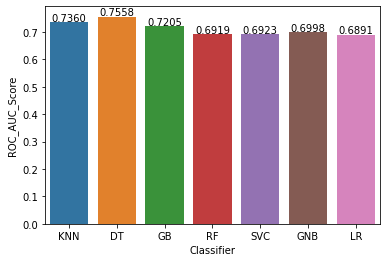

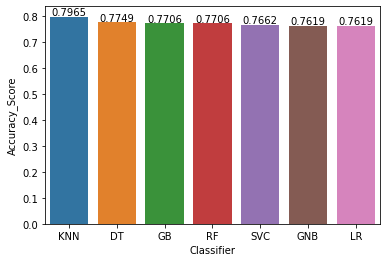

In [ ]:
axis = sns.barplot(x = 'Name', y = 'ROC_AUC_Score', data = tr_split)                                          # plotting barplot x contains names, y contains ROC_AUC_SCORE
axis.set(xlabel='Classifier', ylabel='ROC_AUC_Score')                                                         # setting x label and y label
for p in axis.patches:                                                                                        # formatting the patches
    height = p.get_height()                                                                                   # setting up the height
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")             # aligning text in center of each patch
    
plt.show()                                                                                                    # show the plot

axis = sns.barplot(x = 'Name', y = 'Accuracy_Score', data = tr_split)                                         # plotting barplot x contains names, y contains ROC_AUC_SCORE
axis.set(xlabel='Classifier', ylabel='Accuracy_Score')                                                        # setting x label and y label
for p in axis.patches:                                                                                        # formatting the patches
    height = p.get_height()                                                                                   # setting up the height
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")             # aligning text in center of each patch
    
plt.show()                                                                                                    # show the plot